In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from scipy.stats import zscore

In [35]:
data = pd.read_csv('train.csv')

print(data.isnull().sum() / data.shape[0] * 100)
print(data.nunique() / data.shape[0] * 100)

Id                   0.000000
ID_track             0.000000
Artista              0.000000
Album                0.000000
Nombre_del_track     0.000000
Popularidad          0.000000
Duracion_en_ms       0.000000
Explicitud          25.414319
Bailabilidad         0.000000
Energia             16.605900
Tonalidad            0.000000
Volumen             27.088167
Modo                 0.000000
Palabrería          18.080875
Acustica             0.000000
Instrumentalidad     0.000000
En_Vivo              0.000000
Valencia             0.000000
Tempo                7.441167
Firma_de_tiempo      0.000000
Genero_del_track     0.000000
dtype: float64
Id                  100.000000
ID_track             70.881671
Artista               1.508121
Album                22.704674
Nombre_del_track     54.582367
Popularidad           0.762347
Duracion_en_ms       52.535631
Explicitud            0.016573
Bailabilidad          6.952270
Energia               8.891283
Tonalidad             0.099437
Volumen       

In [36]:
data = data.groupby('ID_track', group_keys=False).apply(lambda group: group.fillna(method='ffill').fillna(method='bfill'))
data = data.infer_objects()
data.reset_index(drop=True, inplace=True)

/tmp/ipykernel_103873/789072283.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.groupby('ID_track', group_keys=False).apply(lambda group: group.fillna(method='ffill').fillna(method='bfill'))
/tmp/ipykernel_103873/789072283.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.groupby('ID_track', group_keys=False).apply(lambda group: group.fillna(method='ffill').fillna(method='bfill'))
/tmp/ipykernel_103873/789072283.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to 

In [37]:
print(data.isnull().sum() / data.shape[0] * 100)

Id                   0.000000
ID_track             0.000000
Artista              0.000000
Album                0.000000
Nombre_del_track     0.000000
Popularidad          0.000000
Duracion_en_ms       0.000000
Explicitud          14.758038
Bailabilidad         0.000000
Energia              9.545907
Tonalidad            0.000000
Volumen             16.423600
Modo                 0.000000
Palabrería          10.018230
Acustica             0.000000
Instrumentalidad     0.000000
En_Vivo              0.000000
Valencia             0.000000
Tempo                3.960888
Firma_de_tiempo      0.000000
Genero_del_track     0.000000
dtype: float64


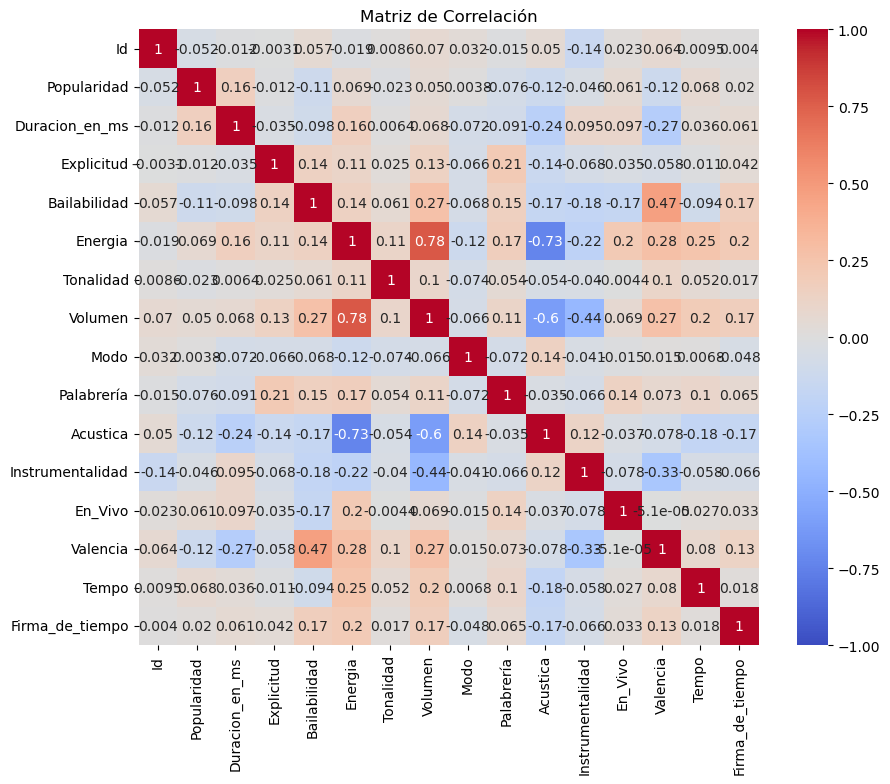

In [38]:
data_numerico = data.select_dtypes(include=[np.number])
matriz_correlacion = data_numerico.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Matriz de Correlación")
plt.show()

In [39]:
df = data.copy()

energia_not_null = df[df['Energia'].notnull()]
X_energia = energia_not_null[['Acustica', 'Volumen']].dropna()
y_energia = energia_not_null.loc[X_energia.index, 'Energia']

model_energia = LinearRegression()
model_energia.fit(X_energia, y_energia)
energia_null = df[df['Energia'].isnull()]
X_pred_energia = energia_null[['Acustica', 'Volumen']]
X_pred_energia = X_pred_energia.dropna()
pred_energia = model_energia.predict(X_pred_energia)
df.loc[X_pred_energia.index, 'Energia'] = pred_energia


volumen_not_null = df[df['Volumen'].notnull()]
X_volumen = volumen_not_null[['Acustica', 'Energia']].dropna()
y_volumen = volumen_not_null.loc[X_volumen.index, 'Volumen']

model_volumen = LinearRegression()
model_volumen.fit(X_volumen, y_volumen)
volumen_null = df[df['Volumen'].isnull()]
X_pred_volumen = volumen_null[['Acustica', 'Energia']]
X_pred_volumen = X_pred_volumen.dropna()
pred_volumen = model_volumen.predict(X_pred_volumen)
df.loc[X_pred_volumen.index, 'Volumen'] = pred_volumen

In [40]:
df.isnull().sum() / df.shape[0] * 100

Id                   0.000000
ID_track             0.000000
Artista              0.000000
Album                0.000000
Nombre_del_track     0.000000
Popularidad          0.000000
Duracion_en_ms       0.000000
Explicitud          14.758038
Bailabilidad         0.000000
Energia              2.601922
Tonalidad            0.000000
Volumen              2.601922
Modo                 0.000000
Palabrería          10.018230
Acustica             0.000000
Instrumentalidad     0.000000
En_Vivo              0.000000
Valencia             0.000000
Tempo                3.960888
Firma_de_tiempo      0.000000
Genero_del_track     0.000000
dtype: float64

In [41]:
df.dtypes

Id                    int64
ID_track             object
Artista              object
Album                object
Nombre_del_track     object
Popularidad           int64
Duracion_en_ms        int64
Explicitud          float64
Bailabilidad        float64
Energia             float64
Tonalidad             int64
Volumen             float64
Modo                  int64
Palabrería          float64
Acustica            float64
Instrumentalidad    float64
En_Vivo             float64
Valencia            float64
Tempo               float64
Firma_de_tiempo       int64
Genero_del_track     object
dtype: object

In [42]:
df["Explicitud"] = df["Explicitud"].fillna(df["Explicitud"].mode()[0])
df["Palabrería"] = df["Palabrería"].fillna(df["Palabrería"].mean())
df["Tempo"] = df["Tempo"].fillna(df["Tempo"].mean())
df["Energia"] = df["Energia"].fillna(df["Energia"].mean())
df["Volumen"] = df["Volumen"].fillna(df["Volumen"].mean())

In [43]:
df.isnull().sum() / df.shape[0] * 100

Id                  0.0
ID_track            0.0
Artista             0.0
Album               0.0
Nombre_del_track    0.0
Popularidad         0.0
Duracion_en_ms      0.0
Explicitud          0.0
Bailabilidad        0.0
Energia             0.0
Tonalidad           0.0
Volumen             0.0
Modo                0.0
Palabrería          0.0
Acustica            0.0
Instrumentalidad    0.0
En_Vivo             0.0
Valencia            0.0
Tempo               0.0
Firma_de_tiempo     0.0
Genero_del_track    0.0
dtype: float64

In [44]:
label_encoder = LabelEncoder()

df['Artista'] = label_encoder.fit_transform(df['Artista'])
df['Genero_del_track'] = label_encoder.fit_transform(df['Genero_del_track'])
df

,Id,ID_track,Artista,Album,Nombre_del_track,Popularidad,Duracion_en_ms,Explicitud,Bailabilidad,Energia,...,Volumen,Modo,Palabrería,Acustica,Instrumentalidad,En_Vivo,Valencia,Tempo,Firma_de_tiempo,Genero_del_track
0,2961,2bPGTMB5sFfFYQ2YvSmup0,131,Rammstein,Deutschland,77,322339,0.0,0.521,0.895000,...,-5.242,1,0.0442,0.000055,0.349000,0.0985,0.2370,120.117,4,2
1,1685,2ZOMnAID3cCIrboS3rWhqx,12,BaianaSystem,Vinheta Baiana,19,82760,0.0,0.427,0.590000,...,-12.379,0,0.0645,0.820000,0.834000,0.2410,0.7220,121.578,4,1
2,106177,1rMfDvE2C8ne8UZj847rKM,0,The Essential Collection,Dancing Queen,63,233440,0.0,0.508,0.825000,...,-9.627,1,0.0451,0.175000,0.001330,0.3760,0.7150,100.548,4,98
3,33241,1BR2rZ8nZ0pPuRkuyE3oZ2,123,Bonanza,La noche de la mesa triste,46,259946,0.0,0.490,0.965000,...,-3.365,1,0.0893,0.001560,0.007030,0.3130,0.5580,92.131,4,30
4,42182,3QIKlxgJe4exDyey5Ibjo7,108,Enemy of the Music Business + Leaders Not Foll...,Next on the List,16,216093,0.0,0.257,0.997000,...,-4.560,1,0.1220,0.000023,0.003710,0.2940,0.2430,115.032,4,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12063,84005,0H0NjRO6P3UAiMU5kJtKoW,153,Christmas Songs 2022,God Only Knows - Mono / 1997 Remastered,5,173040,0.0,0.524,0.487000,...,-7.525,0,0.0299,0.253000,0.000000,0.0579,0.4820,117.108,4,80
12064,22177,1mjC68qU0Q9HlCIZHZAEko,56,L'Enfant Sauvage (Special Edition),The Gift of Guilt,52,356800,0.0,0.197,0.977000,...,-5.630,0,0.0693,0.000098,0.694000,0.1800,0.0819,157.221,4,21
12065,50722,3RG7LorgZGK5U48rfe9Sim,150,Elokuutio,Meidänkaltaisillemme,21,209466,0.0,0.398,0.995000,...,-3.778,1,0.2080,0.000008,0.028400,0.0416,0.3130,181.982,4,47
12066,11295,0j3p1p06deJ7f9xmJ9yG22,154,The Beatles (Remastered),Back In The U.S.S.R. - Remastered 2009,65,163453,0.0,0.480,0.969000,...,-7.464,1,0.0854,0.069000,0.000220,0.0608,0.4940,142.489,4,10


In [ ]:
y = df['Artista']
df = df.drop(columns=['Id', 'ID_track', 'Artista', 'Album', 'Nombre_del_track'])

In [46]:
df.to_csv('train_clean.csv', index=False)
y.to_csv('train_target.csv', index=False)